In [1]:
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
Diamonds_Tr = pd.read_csv('train2.csv')
# Diamonds_Ts = pd.read_csv('/content/drive/MyDrive/test.csv')
Diamonds = Diamonds_Tr.copy()


In [3]:
Diamonds_Tr.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
Diamonds_Tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
Diamonds_Tr.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<AxesSubplot: title={'center': 'Id'}>,
        <AxesSubplot: title={'center': 'carat'}>,
        <AxesSubplot: title={'center': 'depth'}>],
       [<AxesSubplot: title={'center': 'table'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'x'}>],
       [<AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'z'}>, <AxesSubplot: >]],
      dtype=object)

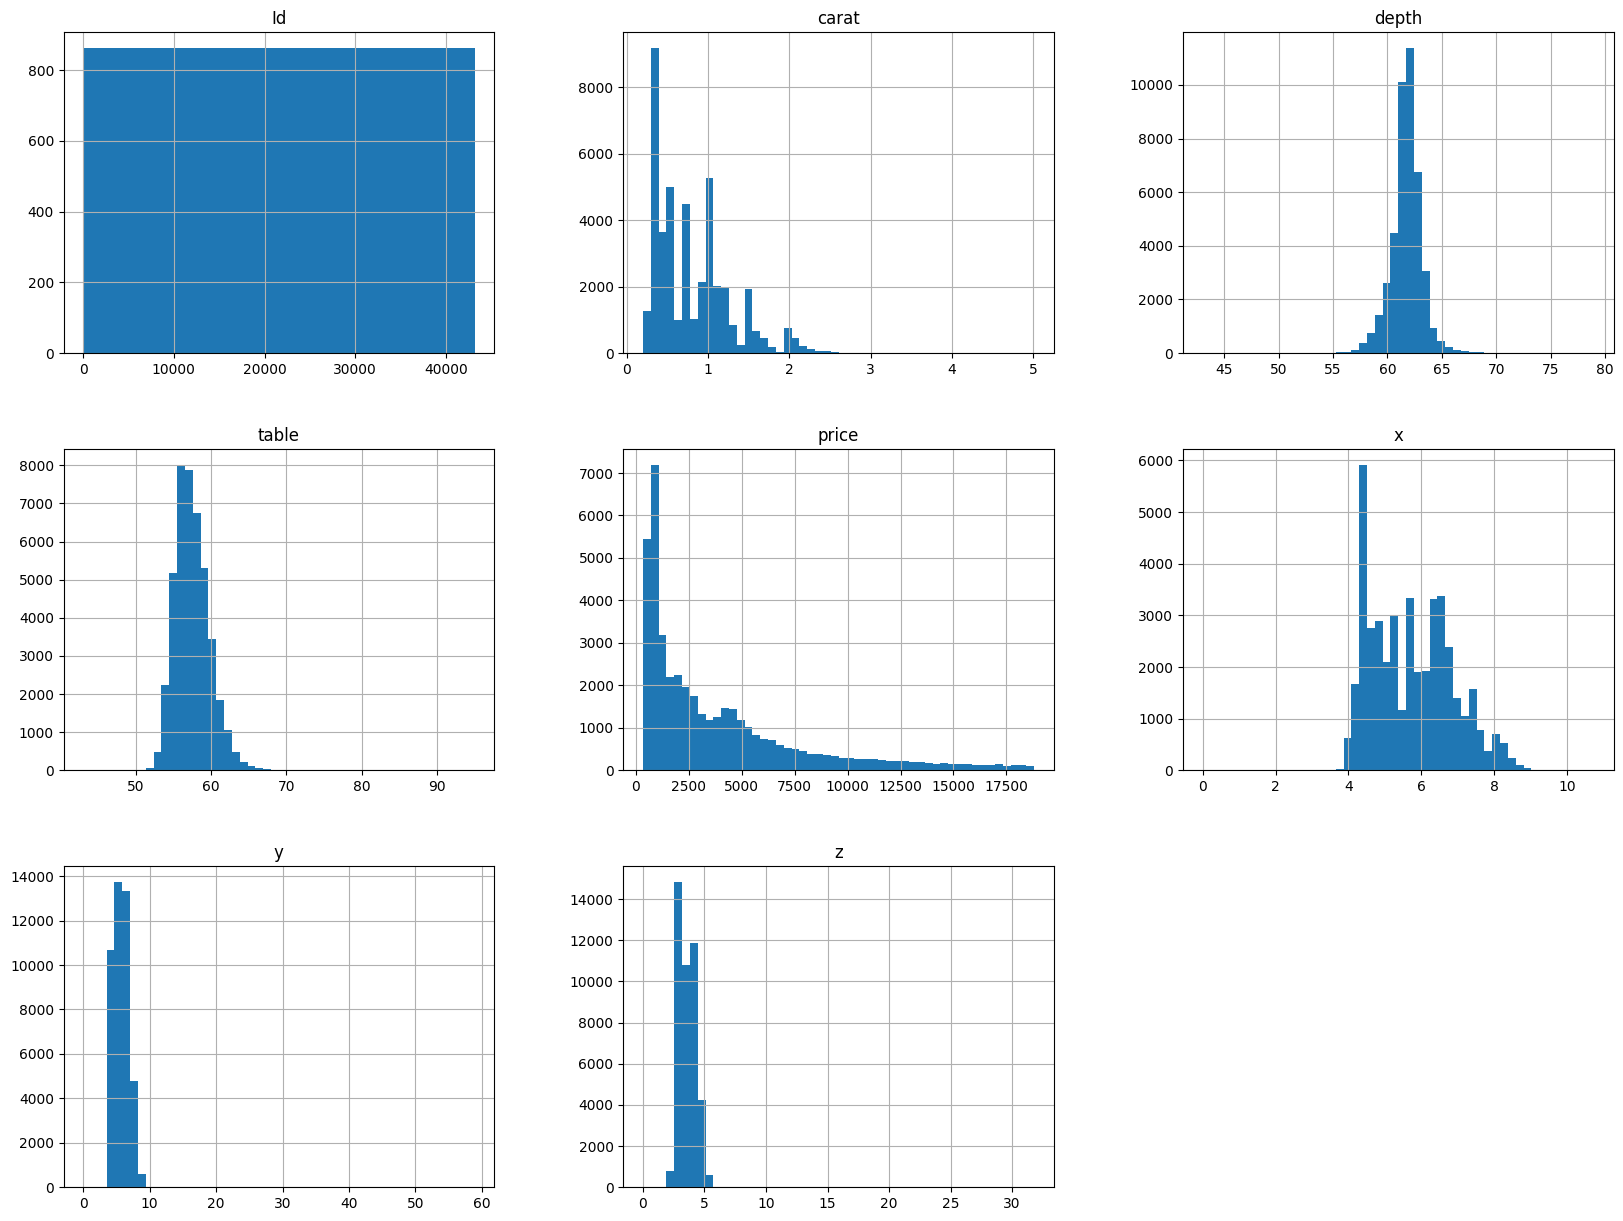

In [6]:
Diamonds_Tr.hist(bins=50, figsize=(20,15))

In [7]:
corr=Diamonds_Tr.corr()

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_3392\1822017952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=Diamonds_Tr.corr()


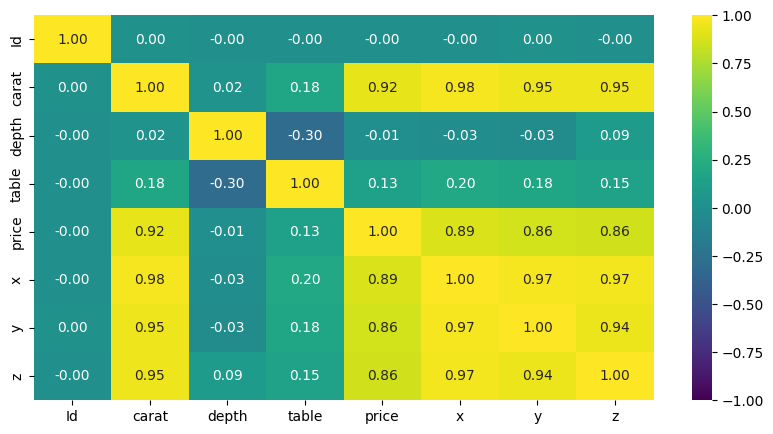

In [8]:
#sns.heatmap(corr,annot=True,if)
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='viridis',fmt='.2f')

array([[<AxesSubplot: xlabel='carat', ylabel='carat'>,
        <AxesSubplot: xlabel='x', ylabel='carat'>,
        <AxesSubplot: xlabel='y', ylabel='carat'>,
        <AxesSubplot: xlabel='z', ylabel='carat'>,
        <AxesSubplot: xlabel='price', ylabel='carat'>],
       [<AxesSubplot: xlabel='carat', ylabel='x'>,
        <AxesSubplot: xlabel='x', ylabel='x'>,
        <AxesSubplot: xlabel='y', ylabel='x'>,
        <AxesSubplot: xlabel='z', ylabel='x'>,
        <AxesSubplot: xlabel='price', ylabel='x'>],
       [<AxesSubplot: xlabel='carat', ylabel='y'>,
        <AxesSubplot: xlabel='x', ylabel='y'>,
        <AxesSubplot: xlabel='y', ylabel='y'>,
        <AxesSubplot: xlabel='z', ylabel='y'>,
        <AxesSubplot: xlabel='price', ylabel='y'>],
       [<AxesSubplot: xlabel='carat', ylabel='z'>,
        <AxesSubplot: xlabel='x', ylabel='z'>,
        <AxesSubplot: xlabel='y', ylabel='z'>,
        <AxesSubplot: xlabel='z', ylabel='z'>,
        <AxesSubplot: xlabel='price', ylabel='z'>],
    

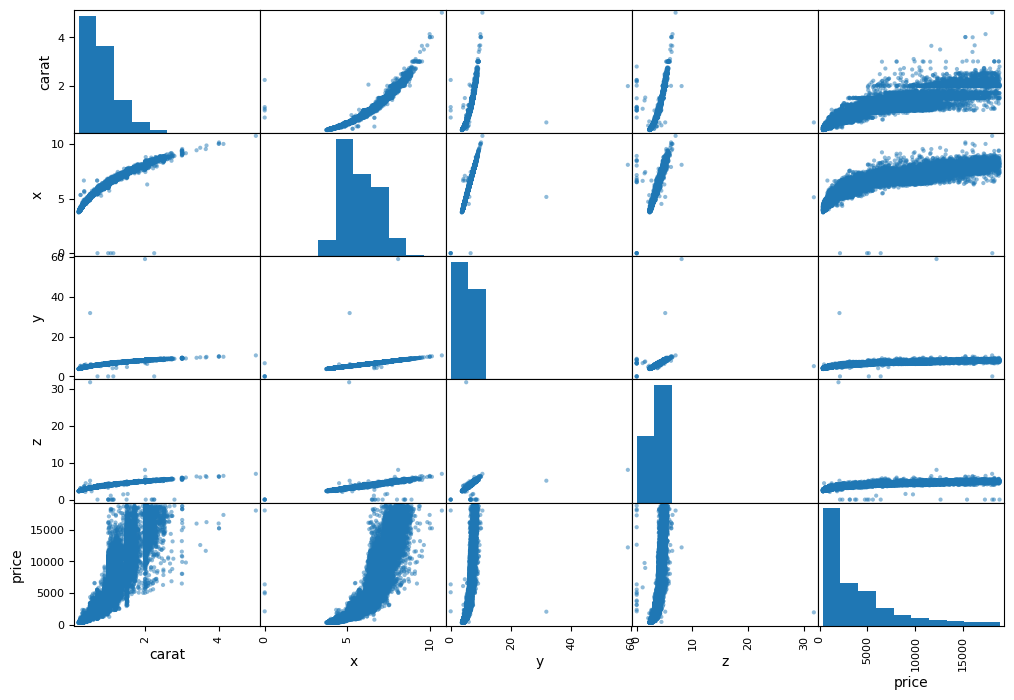

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["carat", "x", "y", "z","price"]
scatter_matrix(Diamonds_Tr[attributes], figsize=(12,8))

In [10]:
Diamonds_Tr.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
Diamonds_Tr["cut"].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [12]:
Diamonds_Tr["color"].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [13]:
Diamonds_Tr["clarity"].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [14]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
cut_encoded = ordinal_encoder.fit_transform(Diamonds_Tr[['cut']])


In [15]:
cut_encoded

array([[4.],
       [3.],
       [4.],
       ...,
       [3.],
       [3.],
       [4.]])

In [16]:
ordinal_encoder.categories_

[array(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype=object)]

In [17]:
ordinal_encoder = OrdinalEncoder()
color_encoded = ordinal_encoder.fit_transform(Diamonds_Tr[['color']])


In [18]:
ordinal_encoder = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
clarity_encoded = ordinal_encoder.fit_transform(Diamonds_Tr[['clarity']])


In [19]:
ordinal_encoder.categories_

[array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
       dtype=object)]

In [20]:
Diamonds_Tr["cut"]=cut_encoded

In [21]:
Diamonds_Tr["color"]=color_encoded

In [22]:
Diamonds_Tr["clarity"]=clarity_encoded

In [23]:
Diamonds_Tr.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,4.0,5.0,1.0,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3.0,3.0,5.0,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,4.0,2.0,3.0,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,4.0,3.0,3.0,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3.0,4.0,5.0,61.0,57.0,2596,5.76,5.72,3.50


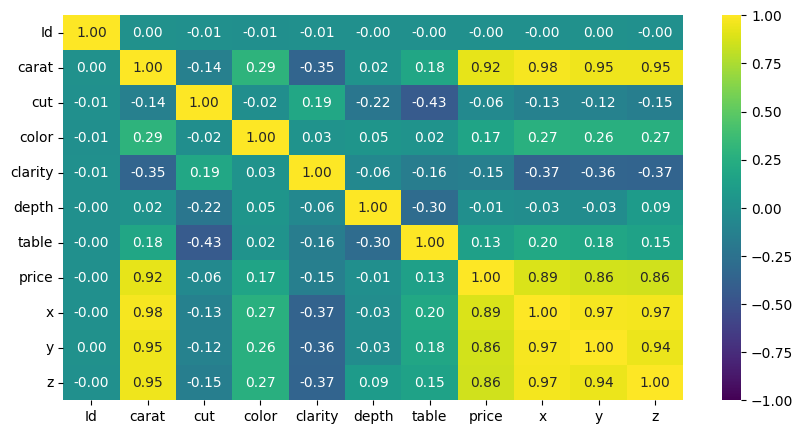

In [24]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(Diamonds_Tr.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis',fmt='.2f')

array([[<AxesSubplot: xlabel='cut', ylabel='cut'>,
        <AxesSubplot: xlabel='color', ylabel='cut'>,
        <AxesSubplot: xlabel='clarity', ylabel='cut'>,
        <AxesSubplot: xlabel='price', ylabel='cut'>],
       [<AxesSubplot: xlabel='cut', ylabel='color'>,
        <AxesSubplot: xlabel='color', ylabel='color'>,
        <AxesSubplot: xlabel='clarity', ylabel='color'>,
        <AxesSubplot: xlabel='price', ylabel='color'>],
       [<AxesSubplot: xlabel='cut', ylabel='clarity'>,
        <AxesSubplot: xlabel='color', ylabel='clarity'>,
        <AxesSubplot: xlabel='clarity', ylabel='clarity'>,
        <AxesSubplot: xlabel='price', ylabel='clarity'>],
       [<AxesSubplot: xlabel='cut', ylabel='price'>,
        <AxesSubplot: xlabel='color', ylabel='price'>,
        <AxesSubplot: xlabel='clarity', ylabel='price'>,
        <AxesSubplot: xlabel='price', ylabel='price'>]], dtype=object)

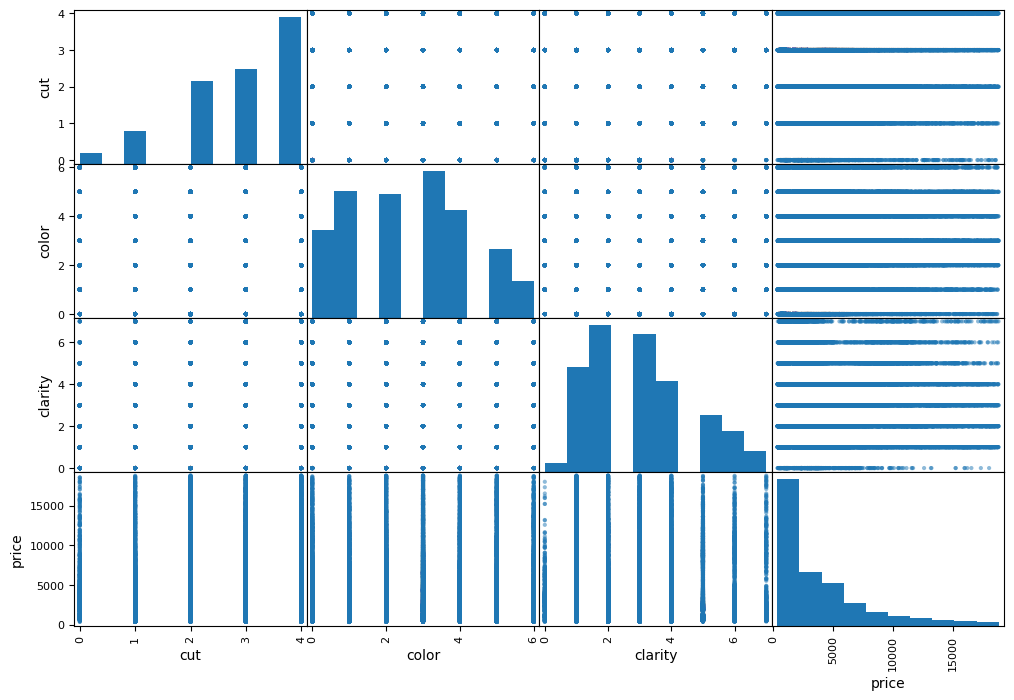

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["cut", "color", "clarity","price"]
scatter_matrix(Diamonds_Tr[attributes], figsize=(12,8))

In [26]:
from sklearn.preprocessing import StandardScaler
Diamonds_Tr_num = Diamonds_Tr.drop("depth", axis=1)
scaler = StandardScaler()
Diamonds_Tr_num_tr = scaler.fit_transform(Diamonds_Tr_num)
Diamonds_Tr_num_tr

array([[-1.73201067,  0.55352944,  0.98206424, ...,  0.74775484,
         0.75294733,  0.75036741],
       [-1.73193039,  1.50372217,  0.08536436, ...,  1.47015258,
         1.46673853,  1.37163489],
       [-1.73185012, -1.0090097 ,  0.98206424, ..., -1.16080215,
        -1.15339745, -1.16991392],
       ...,
       [ 1.73185012, -0.75562498,  0.08536436, ..., -0.69704064,
        -0.752978  , -0.73220273],
       [ 1.73193039, -1.0301251 ,  0.08536436, ..., -1.2053946 ,
        -1.13598791, -1.25463221],
       [ 1.73201067, -0.98789431,  0.98206424, ..., -1.10729121,
        -1.1098736 , -1.12755477]])

In [27]:
from sklearn.preprocessing import StandardScaler
Diamonds_Tr_num = Diamonds_Tr.drop("table", axis=1)
scaler = StandardScaler()
Diamonds_Tr_num_tr = scaler.fit_transform(Diamonds_Tr_num)
Diamonds_Tr_num_tr

array([[-1.73201067,  0.55352944,  0.98206424, ...,  0.74775484,
         0.75294733,  0.75036741],
       [-1.73193039,  1.50372217,  0.08536436, ...,  1.47015258,
         1.46673853,  1.37163489],
       [-1.73185012, -1.0090097 ,  0.98206424, ..., -1.16080215,
        -1.15339745, -1.16991392],
       ...,
       [ 1.73185012, -0.75562498,  0.08536436, ..., -0.69704064,
        -0.752978  , -0.73220273],
       [ 1.73193039, -1.0301251 ,  0.08536436, ..., -1.2053946 ,
        -1.13598791, -1.25463221],
       [ 1.73201067, -0.98789431,  0.98206424, ..., -1.10729121,
        -1.1098736 , -1.12755477]])

In [28]:
Diamonds_Tr_labels = Diamonds["price"].copy()


In [29]:
Diamonds_Tr_featurs =Diamonds.drop(['price','Id'], axis=1)

In [30]:
Diamonds_Tr_featurs

,carat,cut,color,clarity,depth,table,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...
43147,0.52,Ideal,E,VS2,61.5,56.0,5.16,5.18,3.18
43148,0.72,Very Good,D,VS2,62.1,59.0,5.70,5.73,3.55
43149,0.44,Premium,I,VVS1,61.5,58.0,4.95,4.87,3.02
43150,0.31,Premium,E,VS1,60.2,58.0,4.38,4.43,2.65


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [32]:
Diamonds_num=Diamonds.drop(['color','cut','clarity','price','Id'],axis=1)
Diamonds_num

,carat,depth,table,x,y,z
0,1.06,61.8,57.0,6.57,6.60,4.07
1,1.51,60.9,58.0,7.38,7.42,4.51
2,0.32,61.3,56.0,4.43,4.41,2.71
3,0.53,61.2,56.0,5.19,5.22,3.19
4,0.70,61.0,57.0,5.76,5.72,3.50
...,...,...,...,...,...,...
43147,0.52,61.5,56.0,5.16,5.18,3.18
43148,0.72,62.1,59.0,5.70,5.73,3.55
43149,0.44,61.5,58.0,4.95,4.87,3.02
43150,0.31,60.2,58.0,4.38,4.43,2.65


In [33]:
num_pipeline=Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ])

In [34]:
num_attribs=list(Diamonds_num)
num_attribs

['carat', 'depth', 'table', 'x', 'y', 'z']

In [35]:
cut_pipeline = Pipeline([
    ('cut_encoder', OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]))
])

# Define the pipeline for the 'clarity' feature
clarity_pipeline = Pipeline([
    ('clarity_encoder', OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]))
])

# Define the pipeline for the 'color' feature
color_pipeline = Pipeline([
    ('color_encoder', OrdinalEncoder())
])

In [36]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cut", cut_pipeline, ["cut"]),
    ("clarity", clarity_pipeline, ["clarity"]),
    ("color", color_pipeline, ["color"])
])

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
full_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('cut_encoder' , OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])),
        ('color_encoder' , OrdinalEncoder()), 
        ('clarity_encoder' , OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])),
        ('std_scaler', StandardScaler())

    ])


In [38]:
Diamonds_prepared = full_pipeline.fit_transform(Diamonds_Tr_featurs)
Diamonds_prepared

array([[ 0.55352944,  0.03679895, -0.20518007, ...,  4.        ,
         1.        ,  5.        ],
       [ 1.50372217, -0.59018771,  0.24247196, ...,  3.        ,
         5.        ,  3.        ],
       [-1.0090097 , -0.31152697, -0.6528321 , ...,  4.        ,
         3.        ,  2.        ],
       ...,
       [-0.75562498, -0.1721966 ,  0.24247196, ...,  3.        ,
         6.        ,  5.        ],
       [-1.0301251 , -1.077844  ,  0.24247196, ...,  3.        ,
         4.        ,  1.        ],
       [-0.98789431, -0.38119216, -1.10048413, ...,  4.        ,
         3.        ,  3.        ]])

## Models Training

In [ ]:
from sklearn.model_selection import cross_val_score

In [52]:
Diamonds_Ts=pd.read_csv('test.csv')
Diamonds_Ts
X_test=Diamonds_Ts.drop('Id',axis=1)

### Linear Regresssion

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(Diamonds_prepared , Diamonds_Tr_labels)


LinearRegression()

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
some_data = Diamonds_Tr_featurs.iloc[:5]
some_labels = Diamonds_Tr_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Prediction:', lin_reg.predict(some_data_prepared))
print('Lables:', list(some_labels))

Prediction: [ 4360.08746862 11094.93320625   284.50209078  1569.73037498
  3451.87315329]
Lables: [4270, 15164, 828, 1577, 2596]


In [42]:
Diamonds_predictions= lin_reg.predict(Diamonds_prepared)
lin_mse= mean_squared_error(Diamonds_Tr_labels, Diamonds_predictions)
lin_rmse= np.sqrt(lin_mse)
lin_rmse

1210.5169563147958

In [57]:
Diamonds_Ts_prepared = full_pipeline.fit_transform(X_test)
Diamonds_Ts_prepared

array([[-0.96342224, -0.46321052, -0.20230891, ...,  4.        ,
         5.        ,  3.        ],
       [-0.18558493,  0.66259865,  0.24475238, ...,  3.        ,
         3.        ,  1.        ],
       [-0.75319594,  0.73296173, -0.64937019, ...,  2.        ,
         4.        ,  5.        ],
       ...,
       [-0.18558493,  0.38114636, -1.09643147, ...,  4.        ,
         6.        ,  1.        ],
       [ 0.65532028, -0.5335736 ,  1.13887494, ...,  3.        ,
         1.        ,  1.        ],
       [ 2.52633435, -0.18175823,  0.69181366, ...,  3.        ,
         1.        ,  2.        ]])

In [58]:
lin_test_predict=lin_reg.predict(Diamonds_Ts_prepared)
pre_test

array([ 1101.83806233,  3379.61673403,   408.66449959, ...,
        5171.0514609 ,  5945.96658513, 14010.46101906])

In [ ]:
scores = cross_val_score(lin_reg, Diamonds_prepared , Diamonds_Tr_labels, scoring="neg_mean_squared_error", cv=10)
lin_mse_scores=np.sqrt(-scores)

In [ ]:
display_scores(-scores)

In [59]:
submission = Diamonds_Ts [["Id"]]
submission

,Id
0,1
1,2
2,3
3,4
4,5
...,...
10783,10784
10784,10785
10785,10786
10786,10787


In [60]:
submission['price']=lin_test_predict
submission

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_3392\1030031423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=pre_test


,Id,price
0,1,1101.838062
1,2,3379.616734
2,3,408.664500
3,4,3332.295739
4,5,2076.352241
...,...,...
10783,10784,2076.039557
10784,10785,5894.776077
10785,10786,5171.051461
10786,10787,5945.966585


In [ ]:
submission.to_csv("lin_submission.csv" ,index = None)

In [ ]:
pd.read_csv("lin_submission.csv")

### Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor 

In [51]:
tree_reg= DecisionTreeRegressor()
tree_reg.fit(Diamonds_prepared, Diamonds_Tr_labels)

DecisionTreeRegressor()

In [45]:
Diamonds_predictions=tree_reg.predict(Diamonds_prepared)
tree_mse = mean_squared_error(Diamonds_Tr_labels , Diamonds_predictions)
tree_rmse= np.sqrt(tree_mse)
tree_rmse

8.613423979024963

In [49]:
Diamonds_predictions

array([ 4270., 15164.,   828., ...,   990.,   734.,   743.])

In [61]:
tree_test_predict=tree_reg.predict(Diamonds_Ts_prepared)
tree_test_predict

array([  995.,  2982.,   737., ...,  4802.,  5220., 15261.])

In [47]:
scores = cross_val_score(tree_reg, Diamonds_prepared , Diamonds_Tr_labels, scoring="neg_mean_squared_error", cv=10)
tree_mse_scores=np.sqrt(- scores)

In [48]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(-scores)

Scores: [588312.50364921 539825.94491427 585046.59177289 535056.28024334
 554561.17329085 507873.33348783 576909.0523175  513207.59495944
 526075.52200335 540684.94420626]
Mean: 546755.2940844932
Standard deviation: 27294.772271263682


In [117]:
display_scores(-scores)

Scores: [1389067.35127096 1432183.77847319 1541938.97099798 1346000.83546315
 1550067.57602045 1461671.35885266 1650900.07541136 1416674.97533992
 1423197.92645955 1488087.65844064]
Mean: 1469979.0506729838
Standard deviation: 85496.98252788994


In [118]:
-scores.max()

1346000.8354631455

In [ ]:
submission = Diamonds_Ts [["Id"]]
submission['price']=tree_mse_scores
submission.to_csv("lin_submission.csv" ,index = None)


## Random Forest Regressor

In [119]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(Diamonds_prepared , Diamonds_Tr_labels)

RandomForestRegressor()

In [ ]:
forest_test_predict=tree_reg.predict(Diamonds_Ts_prepared)
forest_test_predict

In [120]:
forets_pridictions= forest_reg.predict(Diamonds_prepared)
forest_mse = mean_squared_error(Diamonds_Tr_labels ,forets_pridictions )
forest_rmse = np.sqrt(forest_mse)
forest_rmse

202.71331971351134

In [121]:
scores = cross_val_score(forest_reg, Diamonds_prepared , Diamonds_Tr_labels, scoring="neg_mean_squared_error", cv=10)
forest_mse_scores=np.sqrt(-scores)
display_scores(scores)

Scores: [-319734.11886995 -283948.87064254 -313251.07918144 -281776.67333429
 -310399.50106488 -302087.66443118 -305813.15551271 -281065.17034938
 -272400.1447355  -312911.54434439]
Mean: -298338.7922466253
Standard deviation: 16001.397837468794


# Fine tune the model

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
return_train_score=True)
grid_search.fit(Diamonds_prepared, Diamonds_Tr_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [125]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(Diamonds_prepared, Diamonds_Tr_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [127]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.54517111, 0.0032703 , 0.00231141, 0.01243149, 0.33576964,
       0.00567121, 0.00169382, 0.06268404, 0.03099698])

# Evaluate Your System on the Test Set

In [129]:
test_set=pd.read_csv('test.csv')
test_set

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


In [128]:
X_test = test_set.drop(["Id"], axis=1)
y_test = test_set["price"].copy()
Diamonds_num=X_test.drop(['color','cut','clarity'],axis=1)
num_attribs = list(Diamonds_num)
final_model = grid_search.best_estimator_
final_model

KeyError: "['price'] not found in axis"